# Feromagnetic Phase Transition

## The Ising Model

Ferromagnetic materials undergo a phase transition from a non-magnetic to a magnetic state when temperature is lowered below a certain critical temperature.   This phenomena is known as spontaneous magnetization.  The [Ising model](https://en.wikipedia.org/wiki/Ising_model) is a simple mathematical model capable of realizing such a phase transition.{cite}`Pathria2021`  The Ising model predicts that there is no phase transition in the one-dimensional system.  Onsager was able to show analytically that the spontaneous magnetization takes place in the two dimensional system.  However, even such a simple model becomes mathematically intractable above two dimension.  Then, the mean field approximation, which is expected to be reasonable in higher dimensions, is developed.  According to the mean field theory, the magnetization $m$ satisfy the following transcendental equation:

$$
m = \mu \tanh \left ( \frac{C m}{k_B T} \right )
$$

where $C$ is a positive constant, $T$ temperature, and $\mu$ the magnetic moment of each spin, and $k_B$ the Boltzmann constant.   we want to find the magnetization as a function of temperature. Solving this equation for $m$ is nothing but root finding.  As usual, we first eliminate the constants by normalizing the magnetization as $\xi = \displaystyle\frac{m}{\mu}$ and temperature $\theta = \displaystyle\frac{k_B T}{\mu C}$.  Following the convention in statistical mechanics, we use the inverse temperature $\beta = 1/\theta$. Then, the equation is simplified to

$$
f(\xi) \equiv \xi - \tanh \beta\xi = 0
$$

and the derivative of the function is 

$$
f'(\xi) = 1 - \beta \text{sech}^2(\beta\xi)
$$

It is obvious that $\xi=0$ is a root.  If there is a spontaneous magnetization, there must be other roots.  Since the function is odd, the total number of roots must be odd. Let us plot the function and visually inspect it, one plot for a high temperature with $\beta = 0.5$ and another for a low temperature $\beta=10$.

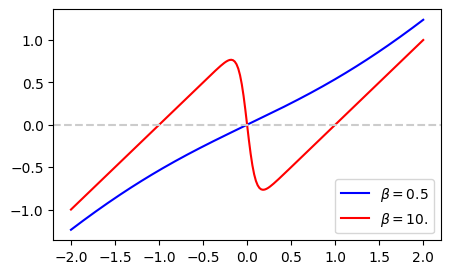

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,beta):
    return x-np.tanh(beta*x)

N=201
beta1=0.5
beta2=10.0
x=np.linspace(-2,2,N)
y1=f(x,beta1)
y2=f(x,beta2)

plt.figure(figsize=(5,3))
plt.plot(x,y1,'-b',label=r"$\beta=0.5$")
plt.plot(x,y2,'-r',label=r"$\beta=10.$")
plt.axhline(y = 0, color = '0.8', linestyle = '--')
plt.legend(loc=4)
plt.show()

For the high temperature case ($\beta=0.5$) , there is only one root at $x=0$.  For the low temperature case, ($\beta=10$), on the other hand, there are three roots, one at $x=0$ and the other two appear below and above $x=0$.  The existence of non-zero roots suggest that the spontaneous magnetization breaks out.  We want to know how the two roots (magnetization) change as the temperature is varied.  It is not necessary to look for all the roots.  The root at $x=0$ always exists. Taking into account the odd symmetry, if $x^*$ is a positive root, then $-x^*$ is the other root.  Therefore, we look for only the positive root.  The following code attempt to find a positive root if any.  Otherwise, it finds a sole root at $x=0$.  There are a few things we must worry.  First of all, we need to avoid zero temperature since ti causes the divided-by-zero error.  Secondly, the initial candidate for the Newton-Raphson method must be chosen carefully since there are multiple roots and it might converge to a wrong one. Based on the above plot, $x=2$ may be a safe choice.


## Bifurcation Diagram

Next, we want to know how the two roots (magnetization) change as the temperature is varied.  It is not necessary to look for all the roots.  The root at $x=0$ always exists. Taking into account the odd symmetry, if $\xi=a$ is a positive root, then $-\xi=-a$ is the other root.  Therefore, we look for only the positive root.  The following code attempt to find a positive root if any.  Otherwise, it finds a sole root at $x=0$. Since the derivative is available, we use the Newton-Raphson method.  There are a few things we must be worried.  First of all, we need to avoid zero temperature since it causes the divided-by-zero error.   Secondly, the initial candidate for the Newton-Raphson method must be chosen carefully since there are multiple roots. It might converge to a wrong root. Based on the above plot, $x=2$ may be a safe choice.


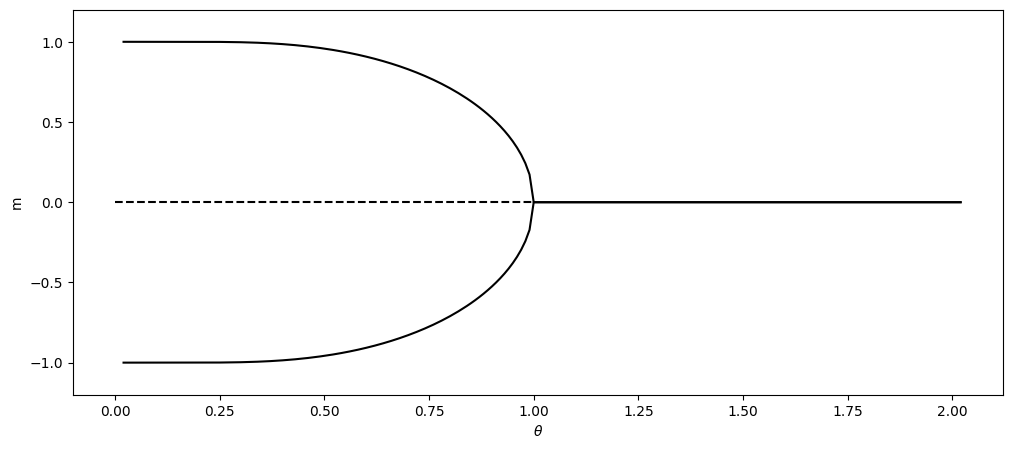

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# define the function
def f(x):
    return x - np.tanh(beta*x)

# define the derivative
def df(x):
    return 1 - beta/np.cosh(beta*x)**2

# the number of different temperatures
N=201

# temperature from 0.02 to 2.02 
t=np.linspace(0,2,N)+0.02

# initial candidate
x0=2.0

# reserve an array for the magnetization
m=np.zeros(N)

# loop over temperature
for k in range(N):
    beta=1/t[k]
    m[k]=newton(f,x0,fprime=df,maxiter=200)


plt.figure(figsize=(12,5))

# plot for the positive root
plt.plot(t,m, '-k')

# since the function is odd, there is a root at -m as well.
plt.plot(t,-m, '-k')

# we know that there is always a root at m=0.
plt.plot([0,1],[0,0],'--k')

plt.ylim([-1.2,1.2])
plt.xlabel(r'$\theta$')
plt.ylabel(r'm')
plt.show()

The plot shows that the spontaneous magnetization appears below $\theta=1$ (It can be shown analytically that the critical temperature is 1.)  As temperature is lowered, the magnetization grows to $\pm 1$.  Although we were not able to compute for the zero temperature, the trend indicates that the magnetization is exactly $\pm 1$ at $\theta=0$.  This plot agrees with experimental observation.{cite}`Pathria2021`